# 1) Introduction and Basics

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile

In [2]:
#path to image
path = '/Users/matthewmiller/Desktop/sreeni_github/images/RGBY.jpg'

#quick funny thing: the imread function below has a 
#positional argument whereby 0 = graylevel and 1 = 
#color. Give it a look:
img_col = cv2.imread(path,1)
img_gray = cv2.imread(path,0)

print(img_col.shape)
print(img_gray.shape)

#the image imported into opencv is simply a numpy array
#note a funny thing: opencv reads in images as 
#BGR as opposed to RGB




(586, 415, 3)
(586, 415)


### Merging and Splitting Images

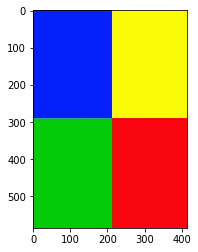

In [6]:
#splitting and merging images:
blue, green,red = cv2.split(img_col)

img_merged_rgb = cv2.merge((red,green,blue))

plt.imshow(img_merged_rgb)

### Image Resizing

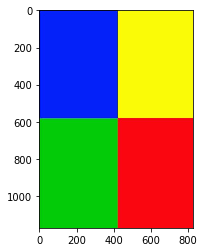

In [10]:
#fx = scale factor in x, fy = scale factor in y
resized = cv2.resize(img_merged_rgb,None,fx=2,fy=2,interpolation=cv2.INTER_AREA)
plt.imshow(resized)

# 2) Denoising and Edge Detection 

Text(0.5, 1.0, 'Noisy')

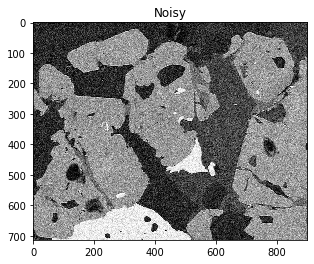

In [30]:
noisy_path = '/Users/matthewmiller/Desktop/sreeni_github/images/BSE_noisy.jpg'
noisy = cv2.imread(noisy_path)
b,g,r = cv2.split(noisy)
noisy_rgb = cv2.merge((b,g,r))
plt.imshow(noisy_rgb)
plt.title("Noisy")

Text(0.5, 1.0, 'Smoothed')

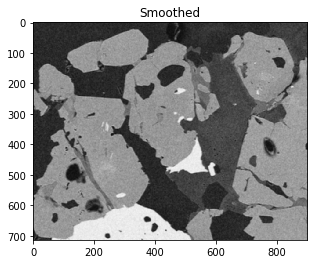

In [21]:
#Defining your own smoothing kernel and applying it
#to an image:

#note: need to normalize your kernel so that you
#do not "change the energy" within your image
custom_kernel= np.ones((5,5),np.float32)/25

#enact smoothing kernel...look up docs
filt_2D = cv2.filter2D(noisy_rgb,-1,custom_kernel)
plt.imshow(filt_2D)
plt.title("Smoothed")

In [22]:
#More filters: Check the OpenCV docs for more!

blur = cv2.blur(noisy_rgb,(3,3))
gaussian_blur = cv2.GaussianBlur(noisy_rgb,(3,3),0)
median_blur = cv2.medianBlur(noisy_rgb,3)
bilateral_blur = cv2.bilateralFilter(noisy_rgb,9,75,75)

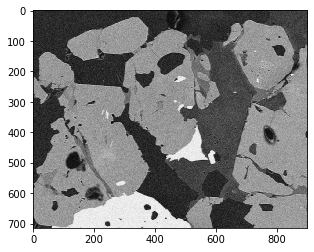

In [26]:
blur.shape
plt.imshow(blur)

### Edge Detection

In [29]:
neuron_path = '/Users/matthewmiller/Desktop/sreeni_github/images/Neuron.jpg'
neuron = cv2.imread(neuron_path,0)

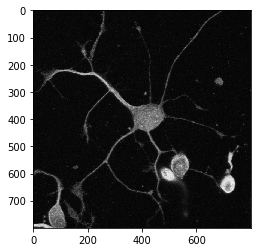

In [31]:
plt.imshow(neuron,cmap = 'gray')

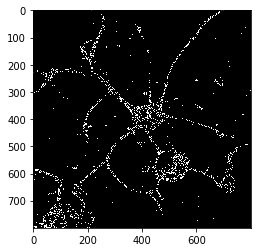

In [38]:
#edge detection with Canny filter...again, check out docs for more
edges = cv2.Canny(neuron,100,120)
plt.imshow(edges,cmap = 'gray')

# CLAHE and Thresholding

### Histogram Equalization

With histogram equalization, you can stretch the histogram of pixel values to reach its entire range.

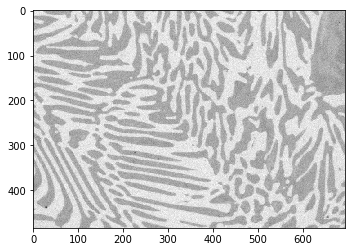

In [2]:
low_qual = cv2.imread('/Users/matthewmiller/Desktop/sreeni_github/images/alloy.jpg',0)
plt.imshow(low_qual,cmap='gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00, 2.5000e+01,
        9.9000e+01, 2.1700e+02, 8.8800e+02, 1.54

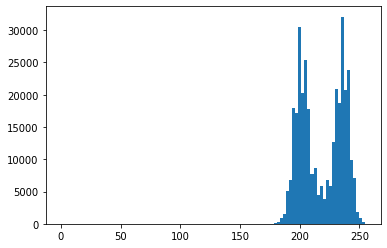

In [3]:
plt.hist(np.ravel(low_qual),bins=100,range=(0,255))


In [5]:
#Now let's equalize it:
eq_img = cv2.equalizeHist(low_qual)

(array([ 2806.,  2883.,  2198.,  2995.,  3842.,  4802.,     0.,  5955.,
            0.,  7166.,     0.,     0.,  8100.,     0.,  9060.,     0.,
            0.,  9738.,     0.,     0., 10360.,     0.,     0., 10465.,
            0.,     0.,     0., 10358.,     0.,  9942.,     0.,     0.,
         9190.,     0.,     0.,  8483.,     0.,  7701.,     0.,  6762.,
            0.,  5838.,  5111.,  4175.,     0.,  6687.,     0.,  5481.,
         2375.,  4201.,  3807.,  3898.,  2077.,  4660.,  2787.,  3133.,
         3575.,     0.,  4271.,  4856.,     0.,  5969.,     0.,  6853.,
            0.,  8028.,     0.,     0.,  8937.,     0.,     0.,  9805.,
            0.,     0., 10372.,     0.,     0., 10733.,     0.,     0.,
        10978.,     0.,     0., 10701.,     0.,     0.,     0., 10043.,
            0.,  9135.,     0.,     0.,  8058.,     0.,  6660.,  5595.,
         4227.,     0.,  5519.,  4545.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

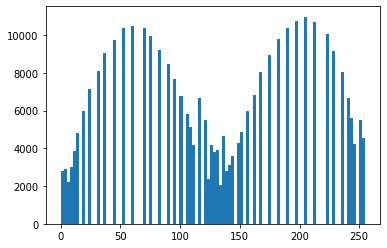

In [27]:
plt.hist(np.ravel(eq_img),bins=100,range=(0,255))


Text(0.5, 1.0, 'Non_Equalized')

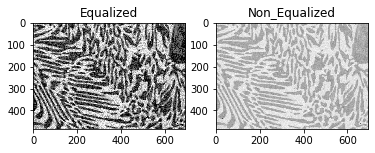

In [13]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(eq_img,cmap='gray')
ax[0].set_title('Equalized')
ax[1].imshow(low_qual,cmap='gray')
ax[1].set_title('Non_Equalized')

### Adaptive Histogram Equalization:

If you have significant changes/heterogeneities from one side of an image to another, chances are that you might not actually want to apply a **global** histogram filtering. You can instead do this in small patches to fit your needs using something called **Contrast Limited Adaptive Histogram Equalization (CLAHE)** in Python. This essentially does histogram equalization in small bites. Let's see below:

In [16]:
#per usual, look up the documentation. 
clahe = cv2.createCLAHE(clipLimit = 2.0,tileGridSize=(8,8))
cl_img = clahe.apply(low_qual) #apply CLAHE after creating CLAHE object


Text(0.5, 1.0, 'CLAHE')

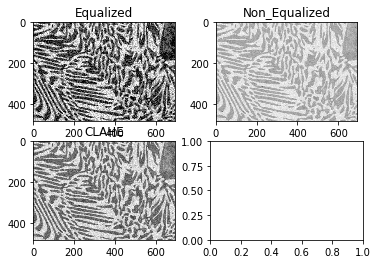

In [19]:
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(eq_img,cmap='gray')
ax[0,0].set_title('Equalized')
ax[0,1].imshow(low_qual,cmap='gray')
ax[0,1].set_title('Non_Equalized')
ax[1,0].imshow(cl_img,cmap='gray')
ax[1,0].set_title('CLAHE')

### Image Thresholding

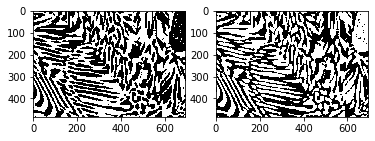

In [22]:
#Look up the docs specifically...

_,thresh1 = cv2.threshold(cl_img,190,150,cv2.THRESH_BINARY)
_,thresh2 = cv2.threshold(cl_img,190,255,cv2.THRESH_BINARY_INV)

fig,ax = plt.subplots(1,2)
ax[0].imshow(thresh1,cmap='gray')
ax[1].imshow(thresh2,cmap='gray')

In [25]:
#What if you don't know the exact best value to segment
#out various structures within an image? Use OTSU as follows:

#Setting the below threshold at 0 lets OTSU search for the optimal point
ret,thresh3 = cv2.threshold(cl_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Optimal Separation at {}'.format(ret))

Optimal Separation at 181.0


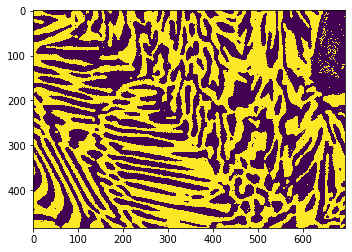

In [26]:
plt.imshow(thresh3)

# Morphological Operations using openCV

"It becomes necessary to cleanup 'noise' after image thresholding. This tutorial explains the use of morphological operators like erosion, dilation and opening to cleanup post-thresholding noise."


In [34]:
#OTSU thresholding
noisy_path = '/Users/matthewmiller/Desktop/sreeni_github/images/BSE_noisy.jpg'
noisy = cv2.imread(noisy_path,0)
ret,thresh3 = cv2.threshold(noisy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



Text(0.5, 1.0, 'After OTSU')

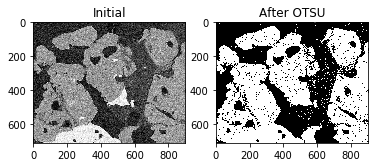

In [37]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(noisy,cmap='gray')
ax[0].set_title("Initial")
ax[1].imshow(thresh3,cmap='gray')
ax[1].set_title("After OTSU")

Ok, not bad. Notice for the above, however, that the OTSU
filtering left some 'specks' within the thresholded grain areas. Let's get rid of them with some morphological ops like erosion and dilation. For this, we need to first create a kernel. 

In [50]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh3,kernel,iterations=1) #do one round of erosion

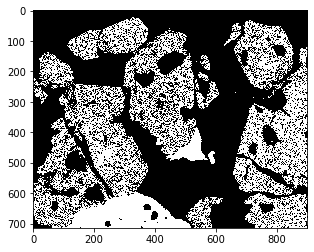

In [51]:
#Note in the below that the erosion step did some good work
#in eroding 'islands' between the grains. However, it also
#created some new problems within the grains themselves. 
#we can take care of those with dilation.
plt.imshow(erosion,cmap='gray')


In [54]:
dilation = cv2.dilate(erosion,kernel,iterations=2)

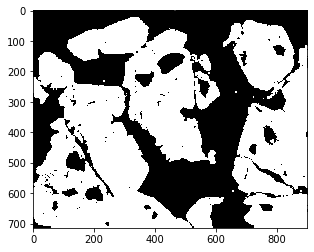

In [55]:
plt.imshow(dilation,cmap='gray')

## Quick lingo: Opening vs. Closing

In **opening**, you have 1) erosion 2) dilation

In **closing** you have 1) dilation 2) erosion

In **top hat**, you have **input - opened image**

In **black hat** you have **input - closed image**

In [61]:
#An example of opening:
opening = cv2.morphologyEx(thresh3,cv2.MORPH_OPEN, kernel)
top_hat = noisy - opening


# Segmentation with Watershed

In [10]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 
from skimage import measure, color, io

#read
img1 = cv2.imread('/Users/matthewmiller/Desktop/sreeni_github/images/grains/grains2.jpg')
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img = np.uint8(img)
pixels_to_um = 0.5

#threshold + OTSU
ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#def kernel and open image 
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=1)


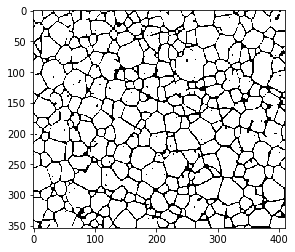

In [125]:
plt.imshow(opening,cmap='gray')

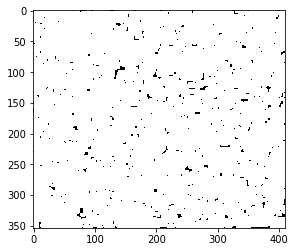

In [126]:
#now we want to make sure that we only get the 
#places that are certainly background by dilating our
#grains and seeing "what remains"
sure_bg = cv2.dilate(opening,kernel,iterations=1)
sure_bg = np.uint8(sure_bg)
plt.imshow(sure_bg,cmap='gray')

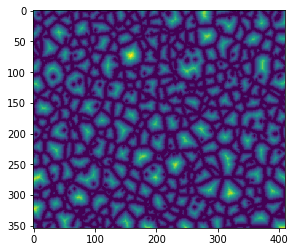

In [133]:
#applying a distance transform: This finds, at each point, the
#L2 distance of a +1 pixel (segmented) to its nearest 0 pixel
#(border/unsegmented)
dist_transform = np.uint8(cv2.distanceTransform(opening,cv2.DIST_L2,3))
plt.imshow(dist_transform)

Text(0.5, 1.0, 'Sure Foreground')

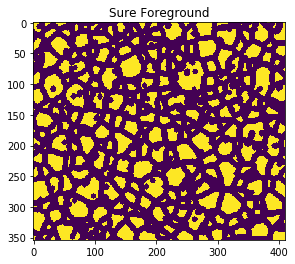

In [134]:
#Ok, now let's segment our *distance transform*:
ret2, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg)
plt.title("Sure Foreground")

Text(0.5, 1.0, 'Unknown pixels:Foreground or Background?')

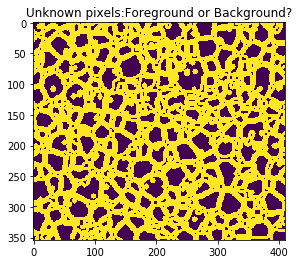

In [135]:
unknown_pixels = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown_pixels)
plt.title('Unknown pixels:Foreground or Background?')

In [136]:

_,markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown_pixels==255]=0
markers = np.uint8(markers)

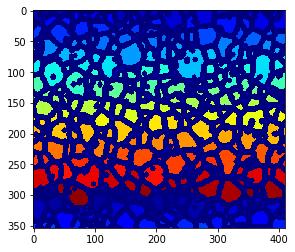

In [137]:
plt.imshow(markers,cmap='jet')

In [139]:
markers = cv2.watershed(img1,markers)

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'


In [140]:
img1.shape

(354, 410, 3)

In [163]:
from skimage.segmentation import clear_border
#Load image in grayscale
img = cv2.imread('/Users/matthewmiller/Desktop/sreeni_github/images/grains/grains2.jpg',0)


ret3,th4 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(th4, cv2.MORPH_OPEN, kernel,iterations=1)
opening = clear_border(opening)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0
markers = markers.astype('int32')

#now load same image as color image
img = cv2.imread('/Users/matthewmiller/Desktop/sreeni_github/images/grains/grains2.jpg',1)

markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]
img2 = color.label2rgb(markers,bg_label=0)

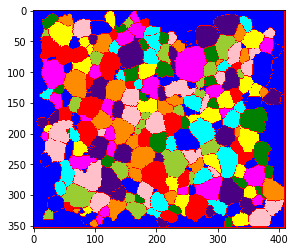

In [164]:
plt.imshow(img2)

In [155]:
import skimage.measure as measure

In [165]:
numpy = np.random.normal((50,50),1,1).astype(np.uint8)

In [166]:
def watershed(path):
    img = cv2.imread(path,0)

    _,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=1)
    opening = clear_border(opening)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=2)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+10
    markers[unknown==255] = 0
    markers = markers.astype('int32')

    #now load same image as color image
    img = cv2.imread('/Users/matthewmiller/Desktop/sreeni_github/images/grains/grains2.jpg',1)

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [0,0,255]
    img2 = color.label2rgb(markers,bg_label=0)
    
    return img2,

In [167]:
import tifffile

In [3]:
to_tiff = '/Volumes/Samsung_T5/7312019_HE_RecognizedCode-8-2-Image Export-01.tif'
to_foxp3 = '/Volumes/Samsung_T5/2019_08_12__FOXP3_RecognizedCode-23-2-Image Export-01/2019_08_12__FOXP3_RecognizedCode-23-2-Image Export-01.tif'

In [4]:
foxp3 = tifffile.imread(to_foxp3)

In [5]:
foxp3 = foxp3[::50,::50,:]

In [6]:
example = tifffile.imread(to_tiff)

In [7]:
example = example[::50,::50,:]

In [19]:
grayf = cv2.cvtColor(foxp3, cv2.COLOR_RGB2GRAY)
grayf = cv2.equalizeHist(grayf)
_,thresh = cv2.threshold(grayf,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=1)

sure_bg = cv2.dilate(opening,kernel,iterations=2)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0
markers = markers.astype('int32')

    #now load same image as color image
img = foxp3

markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]
img2f = color.label2rgb(markers,bg_label=0)

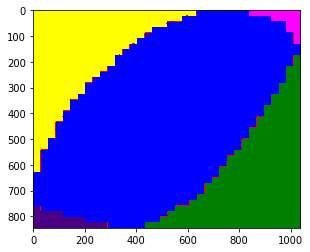

In [20]:
plt.imshow(img2f)

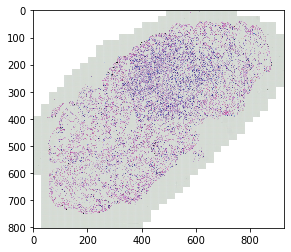

In [218]:
plt.imshow(example)

In [21]:
gray = cv2.cvtColor(example, cv2.COLOR_RGB2GRAY)


In [22]:
_,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=1)

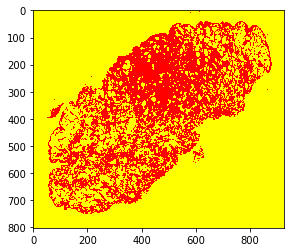

In [23]:
plt.imshow(opening,cmap='autumn')

In [24]:
sure_bg = cv2.dilate(opening,kernel,iterations=2)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

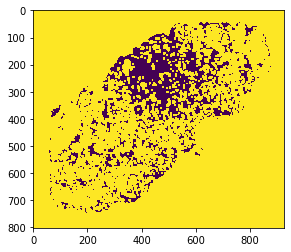

In [25]:
plt.imshow(sure_bg)

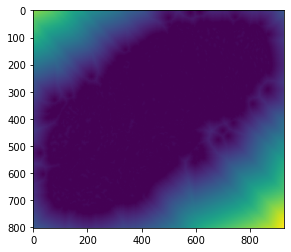

In [26]:
plt.imshow(dist_transform)

In [27]:
ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)

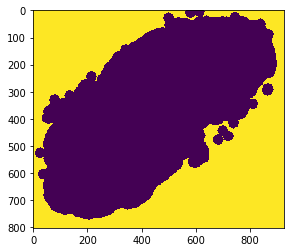

In [28]:
plt.imshow(sure_fg)

In [29]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [30]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==255] = 0
markers = markers.astype('int32')

    #now load same image as color image
img = example

markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]
img2 = color.label2rgb(markers,bg_label=0)

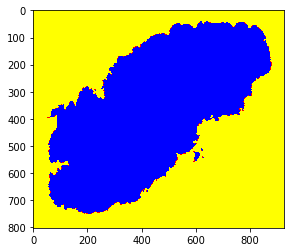

In [31]:
plt.imshow(img2)

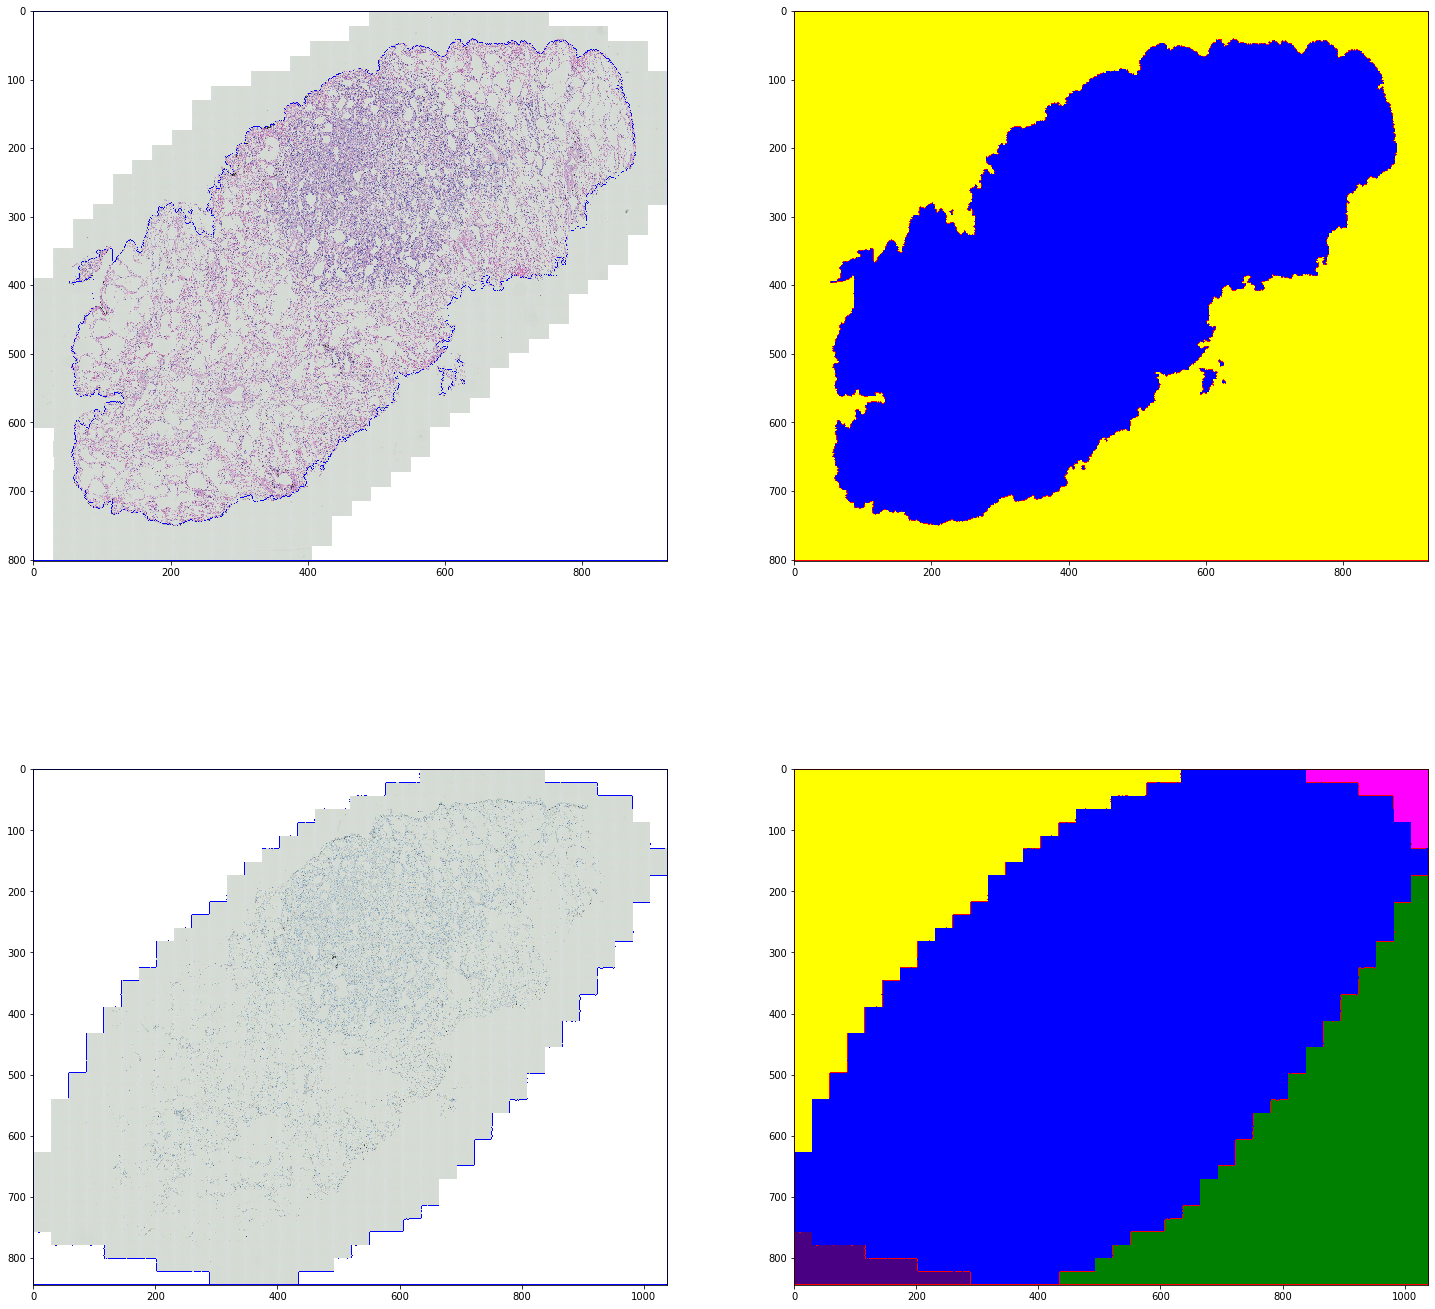

In [32]:
fig,ax = plt.subplots(2,2,figsize = (25,25))
ax[0,0].imshow(example)
ax[0,1].imshow(img2)
ax[1,0].imshow(foxp3)
ax[1,1].imshow(img2f)

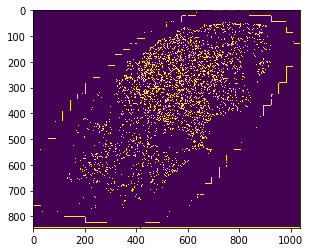

In [103]:
plt.imshow(foxp3)
edges = cv2.Canny(foxp3,100,200)
plt.imshow(edges)

In [106]:
tifffile.imsave('/Users/matthewmiller/Desktop/foxp3.tif',foxp3)

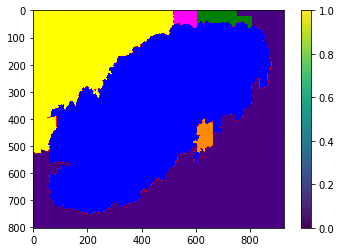

In [207]:
plt.imshow(img2)
plt.colorbar()

# Gabor Filter time!

These are **band pass filters**, meaning that they only let through certain circumstances. 

**Math Background**
Per below, gamma defines the aspect ratio, which controls the symmetry of what is essentially a symmetric Gaussian kernel. Other parameters control certain offsets (...)
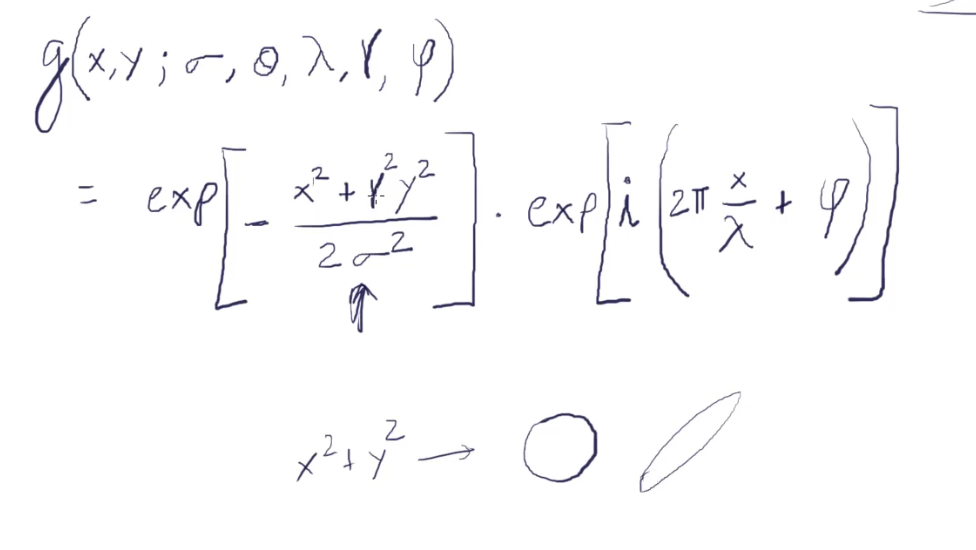

Let's get going!

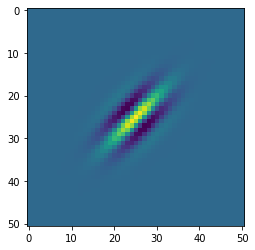

In [37]:
#Let's import necessary things for Gabor!
import numpy as np
import cv2 
import matplotlib.pyplot as plt

ksize=50 #kernel size
sigma=3 #
theta = 1*np.pi/4 #kernel rotation from horizontal (45 degrees)
lamda = 1*np.pi/4
gamma = 0.5
phi = 0 #phase offset. This will "translate" the
#image below across the filter space. Give it a look.

#Gabor kernel:
kernel = cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda, gamma, phi,ktype=cv2.CV_32F)
#So now, at every pixel of our image, the kernel
#will be applied!


#Note that ktype at the end just defines the 
#format in which the kernel weights are defined
#(in our case above, Float32).

#let's actually look at our Gabors!
plt.imshow(kernel)

### What are the right values for Gabor?

Meh, depends on your use case. Generally, try to use a kernel that is <= to the size of your image features though! The general idea is: **if you know what you're looking for, tailor the filter to try getting out those features! If you don't know what you're looking for, however, feel free to random search in the parameter space and generate machine learning features!**

### A little bit more about what they are doing!
Let's start with the example of a rotation (theta != 0 rad). In that case, the filter will "let through" only the features that have the same degree of rotation as the theta defined within the kernel.

### Quickly: a nice example of a use case
Say you have different areass of your image that are rotated differently but have the exact same gray level values (so you can't do some "typical" segmentation tasks on them...). Gabors will come to your rescue!

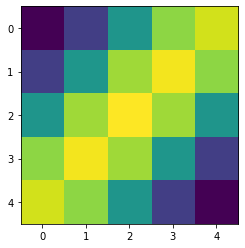

In [74]:
ksize=5 #kernel size
sigma=3 #
theta = 1*np.pi/4 #kernel rotation from horizontal (45 degrees)
lamda = 1*np.pi/4
gamma = 0.5
phi = 0 #phase offset

kernel2 = cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda, gamma, phi,ktype=cv2.CV_32F)
plt.imshow(kernel2)

### Let's practice applying Gabor filters:

In [79]:
#
path = '/Users/matthewmiller/Desktop/sreeni_github/images/BSE_image.jpg'
img = cv2.imread(path)
#make it gray...
img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#quickly resize our kernel for this large image:
#since it's a symmetric kernel this should be ok.
kernel_resized = cv2.resize(kernel2,(400,400))

#filter the image!!
fimg = cv2.filter2D(img,cv2.CV_8UC3,kernel2)

(751, 1000)


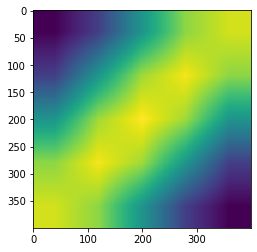

In [80]:
print(img.shape)
plt.imshow(kernel_resized)

In [81]:
path = '/Users/matthewmiller/Desktop/sreeni_github/images/synthetic.jpg'
img = cv2.imread(path)
#make it gray...
img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

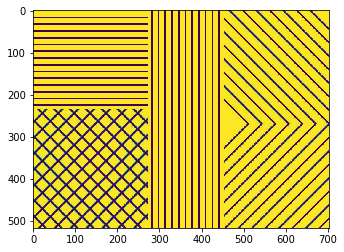

In [82]:
plt.imshow(img)

In [83]:
fimg2 = cv2.filter2D(img,cv2.CV_8UC3,kernel2)

Text(0.5, 1.0, 'Band Pass Filtering!!')

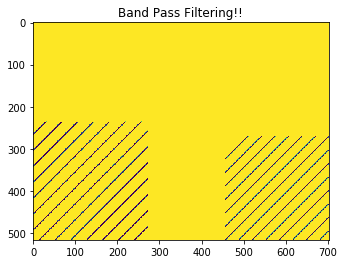

In [85]:
plt.imshow(fimg2)
plt.title('Band Pass Filtering!!')

# Creating Gabor feature banks for machine learning.

Gabor filters are an excellent source of features for machine learning algorithms. 

**Goal of this tutorial: end up with a pandas dataframe that records an image's response to a variety of gabor filters**

We do that right below!

In [98]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd

#now initiate empty DataFrame:
df = pd.DataFrame()
#read in your pixels!
path = '/Users/matthewmiller/Desktop/sreeni_github/images/synthetic.jpg'
img = cv2.imread(path)

#read in your image pixels (still a valuable source
#of information in and of themselves!) and then 
#make a column of them
img2 = img.reshape(-1)
df['original Pixels']=img2


#Now, to generate tons of different Gabor responses, by
#looping over different values.

kernels = []
num = 1

for theta in range(2):
    theta=theta/4*np.pi  
    for sigma in (3,5):
        for lamda in np.arange(0,np.pi,np.pi/4):
            for gamma in (0.05,0.5):
                gabor_label = 'Gabor'+str(num)
                kernel = cv2.getGaborKernel((5,5),sigma,theta,lamda,gamma,0,ktype=cv2.CV_32F)
                fimg = cv2.filter2D(img,cv2.CV_8UC3,kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label]=filtered_img
                num+=1